In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

### 1. pytorch is numpy with gpu

Almost the same API, same smart indexing, minor changes such as  axes name of argument in numpy is called dim in torch and others like this

In [2]:
a = np.ones((10000, 10000), dtype = np.float32) * 3
b = np.arange(10000, dtype = np.float32)
c = a.dot(b)
print(c[:10])

[1.49985e+08 1.49985e+08 1.49985e+08 1.49985e+08 1.49985e+08 1.49985e+08
 1.49985e+08 1.49985e+08 1.49985e+08 1.49985e+08]


In [3]:
%%timeit
c = a.dot(b)

15.4 ms ± 454 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
a = torch.FloatTensor(a)
b = torch.FloatTensor(b)
c = torch.matmul(a, b)
print(c[:10])

tensor([1.4999e+08, 1.4999e+08, 1.4999e+08, 1.4999e+08, 1.4999e+08, 1.4999e+08,
        1.4999e+08, 1.4999e+08, 1.4999e+08, 1.4999e+08])


In [5]:
%%timeit
c = torch.matmul(a, b)

13.2 ms ± 58.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
a = a.cuda()
b = b.cuda()

In [7]:
%%timeit
c = torch.matmul(a, b)

3.32 ms ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 2. Audomatic derivatives

In [8]:
x = torch.tensor([1.0], requires_grad = True)
a = torch.tensor([2.0], requires_grad = True)
print(x)
print(x.dtype)

tensor([1.], requires_grad=True)
torch.float32


In [9]:
print(x.requires_grad)

True


In [10]:
def function(x, a):
    return torch.exp(x * a) - x * x * a * a

In [11]:
y = function(x, a)

In [12]:
print(a.grad)
print(x.grad)

None
None


In [13]:
y.backward()

In [14]:
print(a.grad)
print(x.grad)

tensor([3.3891])
tensor([6.7781])


In [15]:
def der_x_analytical(x, a):
    x = x.data.numpy()
    a = a.data.numpy()
    return np.exp(x * a) * a - 2 * a * a * x

In [16]:
print(der_x_analytical(x, a))

[6.7781115]


### stochastic gradient descent

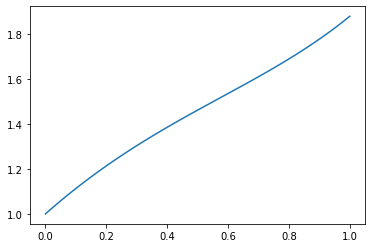

In [17]:
grid = np.linspace(0, 1, 100)
a = 1.2
y = function(torch.tensor(grid), torch.tensor(a)).numpy()
plt.plot(grid, y)

In [18]:
x = np.random.rand(1000)
y = function(torch.tensor(x), torch.tensor(a)).numpy() + np.random.randn(1000) * 0.001

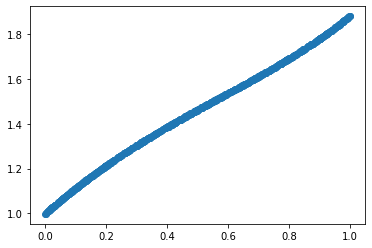

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
plt.plot(x, y, 'o')
plt.show()
print(type(x))
print(type(y))

In [23]:
a = torch.rand(1, requires_grad = True)
print(a)

tensor([0.0849], requires_grad=True)


In [24]:
def loss(predictions, y):
    return torch.mean((torch.tensor(y) - predictions) ** 2)

In [25]:
optimizer = torch.optim.Adam([a])
for i in range(500000):
    predictions = function(torch.tensor(x), a)
    l = loss(predictions, y)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i % 1000 == 0):
        print(i, a)

0 tensor([0.0859], requires_grad=True)
1000 tensor([0.7864], requires_grad=True)
2000 tensor([1.1262], requires_grad=True)
3000 tensor([1.1977], requires_grad=True)
4000 tensor([1.2000], requires_grad=True)
5000 tensor([1.2000], requires_grad=True)
6000 tensor([1.2000], requires_grad=True)
7000 tensor([1.2000], requires_grad=True)
8000 tensor([1.2000], requires_grad=True)
9000 tensor([1.2000], requires_grad=True)
10000 tensor([1.2000], requires_grad=True)
11000 tensor([1.2000], requires_grad=True)
12000 tensor([1.2000], requires_grad=True)
13000 tensor([1.2000], requires_grad=True)
14000 tensor([1.2000], requires_grad=True)
15000 tensor([1.2000], requires_grad=True)
16000 tensor([1.2000], requires_grad=True)
17000 tensor([1.2000], requires_grad=True)
18000 tensor([1.2000], requires_grad=True)
19000 tensor([1.2000], requires_grad=True)
20000 tensor([1.2000], requires_grad=True)
21000 tensor([1.2000], requires_grad=True)
22000 tensor([1.2000], requires_grad=True)
23000 tensor([1.1999], r

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/pozdn/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-96aaef302945>", line 5, in <module>
    l.backward()
  File "/home/pozdn/.local/lib/python3.6/site-packages/torch/tensor.py", line 221, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph)
  File "/home/pozdn/.local/lib/python3.6/site-packages/torch/autograd/__init__.py", line 132, in backward
    allow_unreachable=True)  # allow_unreachable flag
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/pozdn/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exc

KeyboardInterrupt: 